In [7]:
# load_mnist : 라벨 데이터가 저장된 파일과 이미지 데이터가 저장된 파일로부터
# 데이터를 모두 읽어 각각 numpy 배열 labels, images로 저장하여 리턴하는 함수

%matplotlib inline
#import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# 회귀 분석 - 선형 회귀
from sklearn.linear_model import LinearRegression

#회귀 분석 - 다항 회귀
from sklearn.preprocessing import PolynomialFeatures

# MSE : 평균제곱오차, 작을 수록 오차가 작다.
# R2 : 결정 계수, 1에 가까울 수록 적합도가 좋음 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 회귀 분석 - 의사결정트리/랜덤포레스트
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 교차 검증(Cross Vaildation)
#from sklearn.cross_validation import train_test_split

# k-means 클러스터링
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# 계층적 클러스터링
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage # 응집형(Agglomerative)
from scipy.cluster.hierarchy import dendrogram # 응집형(Agglomerative) 
from sklearn.cluster import AgglomerativeClustering # 응집형(Agglomerative) 

# 밀도기반 클러스터링 - DBSCAN
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 딥러닝 - MNIST 데이터
# MNIST 데이터 : 다양한 사람들이 직접 쓴 숫자 0~9까지의 이미지 집합
import os        # [M32] 용도 확인
import struct


style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False


def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' %kind)
    images_path = os.path.join(path, '%s-images.idx3-ubyte' %kind)
    
    with open(labels_path, 'rb') as lbpath:
        # imgpath 파일에서 8바이트 데이터를 big-endian(>)으로 읽고,
        # 읽은 데이터를 unsigned integer(I) 2개로 나누어서 
        # 각각 magic, n 변수에 대입하라는 뜻입니다.
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        
    return images, labels


X_train, y_train = load_mnist('./data/mnist', kind='train')
print('학습 샘플수\t:%d, 컬럼수: %d' %(X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('./data/mnist', kind='t10k')
print('테스트 샘플수\t:%d, 컬럼수: %d' %(X_test.shape[0], X_test.shape[1]))


학습 샘플수	:60000, 컬럼수: 784
테스트 샘플수	:10000, 컬럼수: 784


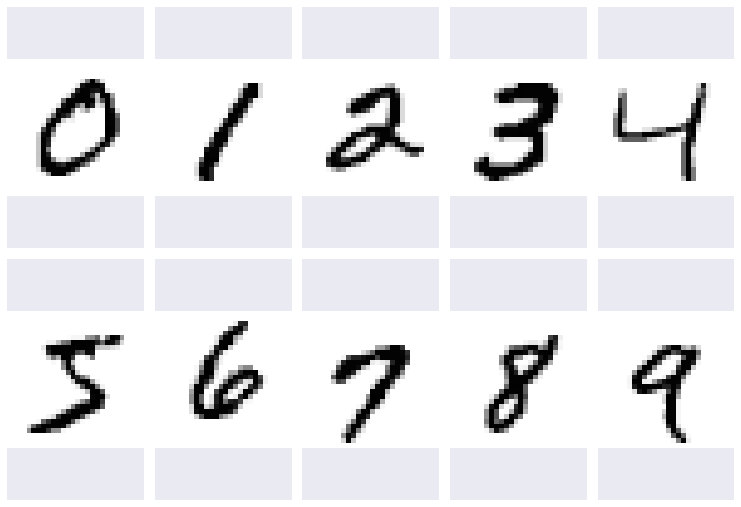

In [10]:
# X_train에 저장된 0~9까지 이미지를 화면에 출력하는 코드

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.ravel()

for i in range(10):
    img = X_train[y_train==i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


학습 샘플수	:60000, 컬럼수: 784
(60000, 784)


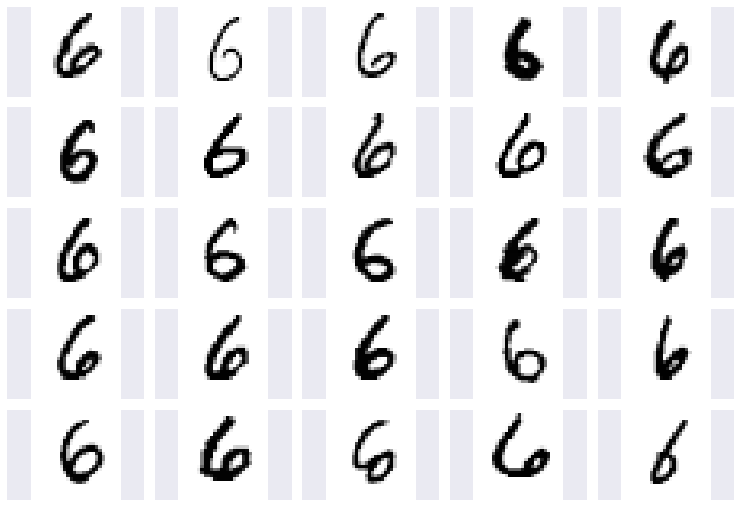

In [14]:
# 위 코드를 약간 수정해서 같은 숫자 25개에 대한 이미지를
# 출력하는 코드

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.ravel()

print('학습 샘플수\t:%d, 컬럼수: %d' %(X_train.shape[0], X_train.shape[1]))
print(X_train.shape)
for i in range(25):
    img = X_train[y_train==6][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# 이로써 우리가 확보한 MNIST 손글씨 데이터가 어떤 식으로 되어있는지
# 확인하였다.